In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
merged_files_filtered = pd.read_csv('./data/stress_urinary_incontinence.csv')

In [3]:
merged_files_filtered.head()

,Unnamed: 0,MDR_REPORT_KEY,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,...,LOT_NUMBER,OTHER_ID_NUMBER,DEVICE_AVAILABILITY,DATE_RETURNED_TO_MANUFACTURER,DEVICE_REPORT_PRODUCT_CODE,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,UDI-PUBLIC
0,106741,6383024,106903842,N,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,NaN,NaN,N,NaN,OTN,DA,N,N,NaN,NaN
1,106742,6383024,106903843,D,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,NaN,NaN,N,NaN,OTN,DA,N,N,NaN,NaN
2,144133,6383024,109652829,N,1,NaN,"IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...",NaN,NaN,NaN,...,NaN,NaN,N,NaN,OTN,DA,N,N,NaN,NaN
3,703424,6383024,69202956,N,1,NaN,MANUFACTURER REFERENCE NUMBER: (B)(4). INCIDEN...,NaN,NaN,NaN,...,NaN,NaN,N,NaN,OTN,DA,N,N,NaN,NaN
4,703425,6383024,69202957,D,1,NaN,THE PATIENT'S ATTORNEY ALLEGED A DEFICIENCY AG...,NaN,NaN,NaN,...,NaN,NaN,N,NaN,OTN,DA,N,N,NaN,NaN


In [4]:
merged_files_filtered.shape

(6312, 37)

In [12]:
irrelevant_words = ['pt', 'surgeon', 'would', 'b']
# irrelevant_words = ['PATIENT', 'DEVICE', 'B']

In [15]:
merged_files_filtered['DATE_RECEIVED'] = pd.to_datetime(merged_files_filtered['DATE_RECEIVED'])

# Tokenize the FOI_TEXT column
stop_words = set(stopwords.words('english'))
merged_files_filtered['tokens'] = merged_files_filtered['FOI_TEXT'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words and word.lower() not in irrelevant_words])

# Extract keywords from the tokens column
keywords = Counter()
for token_list in merged_files_filtered['tokens']:
    keywords.update(token_list)    

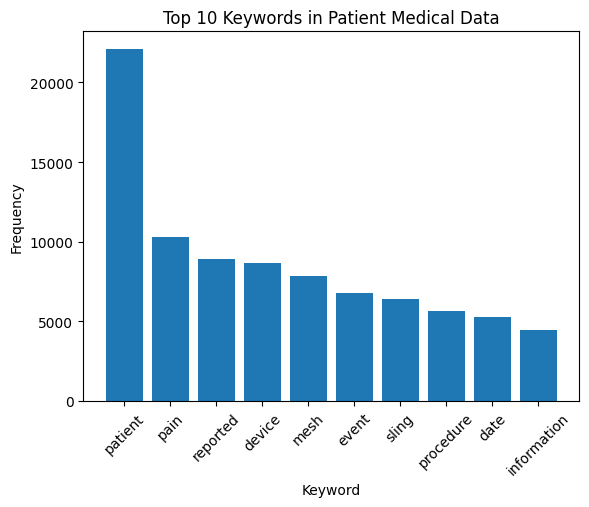

In [17]:
# Select the top 10 keywords and create a bar chart
top_keywords = dict(keywords.most_common(10))
plt.bar(top_keywords.keys(), top_keywords.values())
plt.title('Top 10 Keywords in Patient Medical Data')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [20]:
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [22]:
merged_files_filtered.shape

(6312, 38)

In [21]:
merged_files_filtered.head()

,Unnamed: 0,MDR_REPORT_KEY,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,...,OTHER_ID_NUMBER,DEVICE_AVAILABILITY,DATE_RETURNED_TO_MANUFACTURER,DEVICE_REPORT_PRODUCT_CODE,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,UDI-PUBLIC,tokens
0,106741,6383024,106903842,N,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,NaN,N,NaN,OTN,DA,N,N,NaN,NaN,"[based, additional, information, received, com..."
1,106742,6383024,106903843,D,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,NaN,N,NaN,OTN,DA,N,N,NaN,NaN,"[based, additional, information, received, com..."
2,144133,6383024,109652829,N,1,NaN,"IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...",NaN,NaN,NaN,...,NaN,N,NaN,OTN,DA,N,N,NaN,NaN,"[information, provided, future, supplemental, ..."
3,703424,6383024,69202956,N,1,NaN,MANUFACTURER REFERENCE NUMBER: (B)(4). INCIDEN...,NaN,NaN,NaN,...,NaN,N,NaN,OTN,DA,N,N,NaN,NaN,"[manufacturer, reference, number, incident, da..."
4,703425,6383024,69202957,D,1,NaN,THE PATIENT'S ATTORNEY ALLEGED A DEFICIENCY AG...,NaN,NaN,NaN,...,NaN,N,NaN,OTN,DA,N,N,NaN,NaN,"[patient, attorney, alleged, deficiency, devic..."
